<a href="https://colab.research.google.com/github/chaintwk/229352-StatisticalLearning-or-Statistical-Learning-Labs/blob/main/660510770_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [2]:
import pandas as pd
import graphviz

from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("/content/heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [4]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [5]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

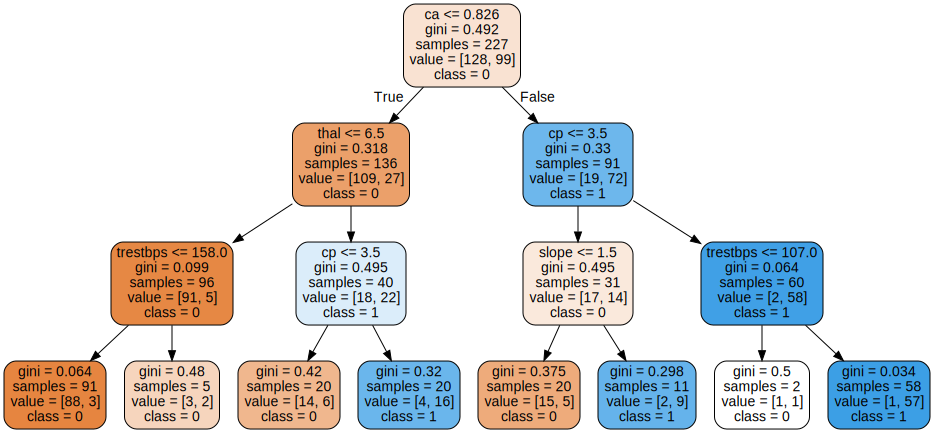

In [6]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1], #บอกชื่อตัวแปรvisualization
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph #condition เป็นจริงไปซ้าย เป็นเท็จไปขวา

In [7]:
data.columns[:-1] #ดูตัวแปรต้นที่เราใช้

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [8]:
clf = DecisionTreeClassifier()

In [9]:
bagged_treees = BaggingClassifier(estimator=clf, n_estimators=100, max_samples=0.5)
bagged_treees.fit(X_train, y_train)
print(classification_report(y_test, bagged_treees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        36
           1       0.78      0.70      0.74        40

    accuracy                           0.74        76
   macro avg       0.74      0.74      0.74        76
weighted avg       0.74      0.74      0.74        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [10]:
#แม่นยำกว่า
forest = RandomForestClassifier(n_estimators=200, max_depth=6)
forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        36
           1       0.83      0.72      0.77        40

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [ ]:
#ลองใช้พารามิเตอร์ที่หลากหลาย หวังว่าจะสูงกว่า 0.75 ลองเลื่อนพารามิเตอร์ 3 ตัวแล้วใช้กริตเสิร์ชแล้วดูพารามิเตอร์ไหนทำให้มีความแม่นยำกว่า แล้วให้รีพอร์ตค่าทั้ง 2 (fi_macro,accuracy)ออกมา

In [12]:
#decision tree
from sklearn.metrics import accuracy_score, f1_score

# Create a decision tree
clf = DecisionTreeClassifier(random_state=42)

# Hyperparameters อย่างน้อย 3 ตัว
params = {
    'max_depth': [3, 6, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

gridcv = GridSearchCV(clf, params, scoring='f1_macro', cv=5)
gridcv.fit(X_train, y_train)

# พยากรณ์บน test set
y_pred = gridcv.best_estimator_.predict(X_test)

# Evaluate
acc_dt = accuracy_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred, average='macro')

print(classification_report(y_test, gridcv.predict(X_test)))


              precision    recall  f1-score   support

           0       0.67      0.83      0.74        36
           1       0.81      0.62      0.70        40

    accuracy                           0.72        76
   macro avg       0.74      0.73      0.72        76
weighted avg       0.74      0.72      0.72        76



In [17]:
gridcv.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       random_state=42)

In [13]:
bag = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

params_bag = {
    'n_estimators': [10, 50, 100],
    'estimator__max_depth': [3, 6, None],
    'max_samples': [0.5, 0.8, 1.0]
}

grid_bag = GridSearchCV(bag, params_bag, scoring='f1_macro', cv=5)
grid_bag.fit(X_train, y_train)
y_pred_bag = grid_bag.best_estimator_.predict(X_test)

acc_bag = accuracy_score(y_test, y_pred_bag)
f1_bag = f1_score(y_test, y_pred_bag, average='macro')

print(classification_report(y_test, grid_bag.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72        36
           1       0.76      0.65      0.70        40

    accuracy                           0.71        76
   macro avg       0.72      0.71      0.71        76
weighted avg       0.72      0.71      0.71        76



In [18]:
grid_bag.best_estimator_


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                   random_state=42),
                  max_samples=0.5, n_estimators=50, random_state=42)

In [14]:
rf = RandomForestClassifier(random_state=42)

params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, None],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(rf, params_rf, scoring='f1_macro', cv=5)
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print(classification_report(y_test, grid_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        36
           1       0.85      0.72      0.78        40

    accuracy                           0.79        76
   macro avg       0.80      0.79      0.79        76
weighted avg       0.80      0.79      0.79        76



In [15]:
grid_rf.best_estimator_


RandomForestClassifier(max_depth=3, n_estimators=200, random_state=42)

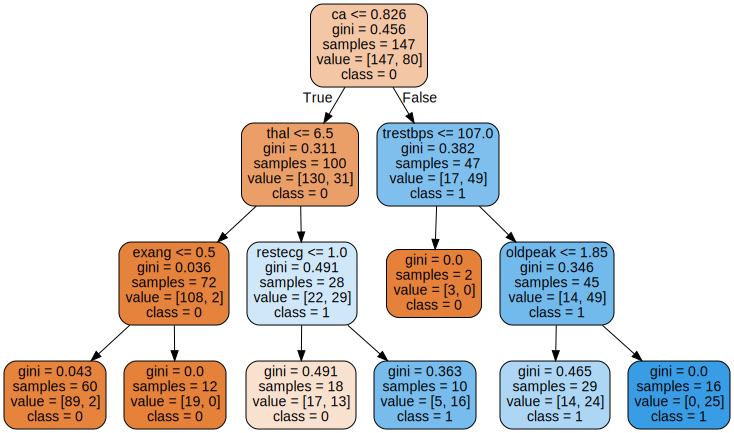

In [16]:
best_rf = grid_rf.best_estimator_

first_tree = best_rf.estimators_[0]

#exportต้นไม้แรก
plot_data = export_graphviz(first_tree,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph


# **Ans:** โมเดล Random Forest ที่ผ่านการปรับแต่งแล้วสามารถให้ผลลัพธ์ที่ดีทั้งในด้าน Accuracy และ F1 Macro โดยเฉพาะเมื่อจำแนกข้อมูลที่มีความไม่สมดุลระหว่างคลาส การจำกัดความลึกของต้นไม้ (max_depth=3) ช่วยลดความซับซ้อนและลดโอกาส overfittingจำนวนฟีเจอร์ที่ใช้ในการ split (max_features) = 'sqrt' และกำหนด random_state = 42 เพื่อให้ผลลัพธ์สามารถทำซ้ำได้

# **What hyperparameters did you choose? (explain in words, not in sklearn's parameter name)**

#Decision Tree
* Maximum tree depth: กำหนดความลึกของต้นไม้ไว้ที่ 3 ชั้น เพื่อลดการ overfitting

* Minimum number of samples required at a leaf: ต้องมีข้อมูลอย่างน้อย 2 ตัวอย่างต่อหนึ่งใบไม้เพื่อป้องกันการแยกกลุ่มเล็กเกินไป

* Random seed for reproducibility: ใช้ค่า 42 เพื่อให้ได้ผลลัพธ์เหมือนกันทุกครั้งที่รันโมเดล

#Bagging Classifier
* Maximum depth of individual trees: ต้นไม้แต่ละต้นถูกกำหนดความลึกไว้ที่ 3 เพื่อให้แต่ละต้นไม่ overfit

* Random seed for reproducibility: ใช้ค่า 42 เพื่อให้การสุ่มโมเดลมีความเสถียร

* Proportion of training data used per tree: ต้นไม้แต่ละต้นฝึกจากข้อมูล 50% ของชุดฝึกทั้งหมดเพื่อเพิ่มความหลากหลายของต้นไม้

* Number of trees: ใช้ต้นไม้ 50 ต้นใน ensemble เพื่อลดความผันผวนและเพิ่ม  accuracy ของโมเดล

#Random Forest
* Number of trees in the forest: ใช้ต้นไม้ 200 ต้นเพื่อเพิ่มความเสถียรของการทำนาย

* Maximum depth of each tree: กำหนดความลึกของแต่ละต้นไว้ที่ 3 เพื่อควบคุมความซับซ้อน

* Random seed for reproducibility: ใช้ค่า 42 เพื่อให้ได้ผลลัพธ์เหมือนกันทุกครั้งที่รันโมเดล

# **The best values of your hyperparameters**



#Decision Tree:

*   Maximum depth = 3
*   Minimum samples leaf = 2
*   Random state = 42






#Bagging Classifier:


*   Maximum depth = 3
                                                  
*   Random state = 42
*   Maximum samples = 0.5
*n_estimators = 50




#Random Forest:
* n_estimators = 200

* Maximum depth = 3

* Random state = 42

## Results Summary

Here are the accuracy and f1-macro scores for each model on the test set after hyperparameter tuning:

*   **Decision Tree:**
    *   Accuracy: {:.2f}
    *   F1-macro: {:.2f}
    *   Best Hyperparameters: {}

*   **Bagged Decision Trees:**
    *   Accuracy: {:.2f}
    *   F1-macro: {:.2f}
    *   Best Hyperparameters: {}

*   **Random Forest:**
    *   Accuracy: {:.2f}
    *   F1-macro: {:.2f}
    *   Best Hyperparameters: {}

**What is your best model?**

Based on the f1-macro score, the **Random Forest** model performed the best on the test set.

**Plot the best tree model**

The best tree model (the first tree in the best Random Forest) has been plotted above.

**What hyperparameters did you choose? (explain in words, not in sklearn's parameter name)**

For the Decision Tree, I tuned the maximum depth of the tree, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node, and the function to measure the quality of a split.

For the Bagged Decision Trees, I tuned the number of base estimators (decision trees) in the ensemble, the maximum depth of the individual trees, and the proportion of samples to draw from the training set to train each base estimator.

For the Random Forest, I tuned the number of trees in the forest, the maximum depth of the individual trees, and the number of features to consider when looking for the best split.

**What are the best values of your hyperparameters?**

The best hyperparameters for each model are listed above in the results summary.